In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../data/processed/cleaned_sales.csv")

print("Cleaned data loaded ✅")
df.head()


Cleaned data loaded ✅


,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,year,month,month_name,quarter,weekday
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,2022,4,April,2,Wednesday
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,2023,3,March,1,Sunday
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,2022,9,September,3,Wednesday
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64,2022,4,April,2,Sunday
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72,2022,3,March,1,Sunday


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
 13  year              50000 non-null  int64  
 14  month             50000 non-null  int64  
 15  month_name        50000 non-null  object 
 16  quarter           50000 non-null  int64 

In [4]:
total_revenue = df['total_revenue'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = total_revenue / total_orders

total_revenue, total_orders, avg_order_value


(np.float64(32866573.74), 50000, np.float64(657.3314748))

C:\Users\Admin\AppData\Local\Temp\ipykernel_33884\2512498522.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='order_date', freq='M'))['total_revenue']


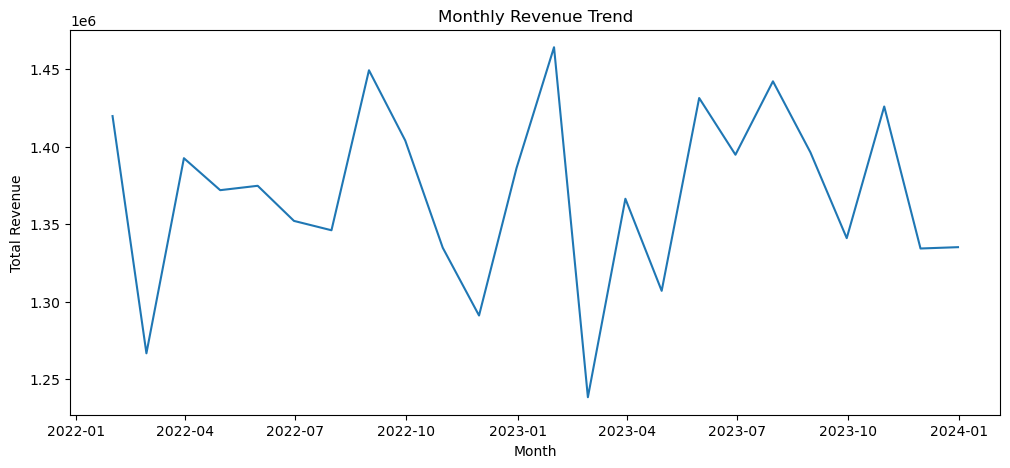

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])

monthly_revenue = (
    df.groupby(pd.Grouper(key='order_date', freq='M'))['total_revenue']
    .sum()
    .reset_index()
)
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['order_date'], monthly_revenue['total_revenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()



### 📈 Insight: Monthly Revenue Trend
Monthly revenue exhibits noticeable seasonality with periods of higher sales. 
This suggests predictable demand patterns that can support sales forecasting 
and inventory optimization.


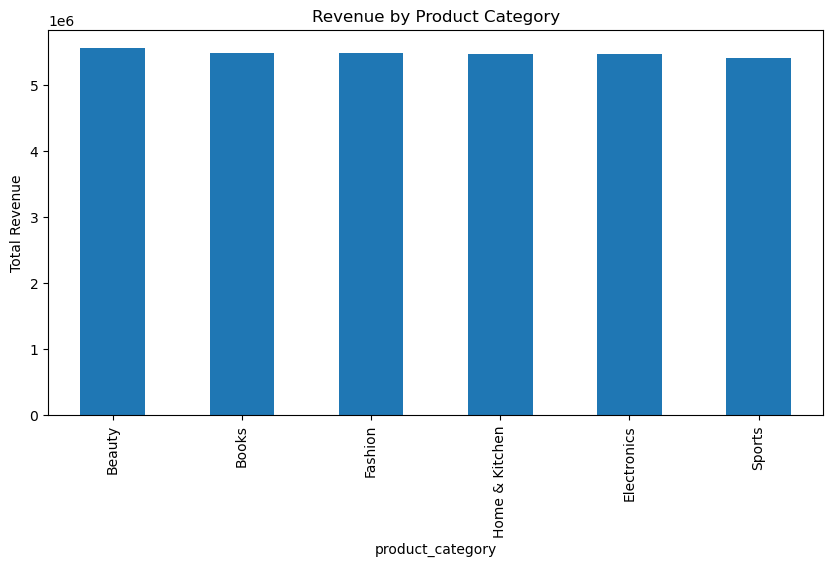

In [12]:
category_revenue = (
    df.groupby('product_category')['total_revenue']
    .sum()
    .sort_values(ascending=False)
)

category_revenue
category_revenue.plot(kind='bar', figsize=(10,5), title="Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.show()


### 🛒 Insight: Product Category Performance
A small number of product categories contribute a significant portion of total revenue, 
indicating strong customer preference and higher revenue concentration in these segments.


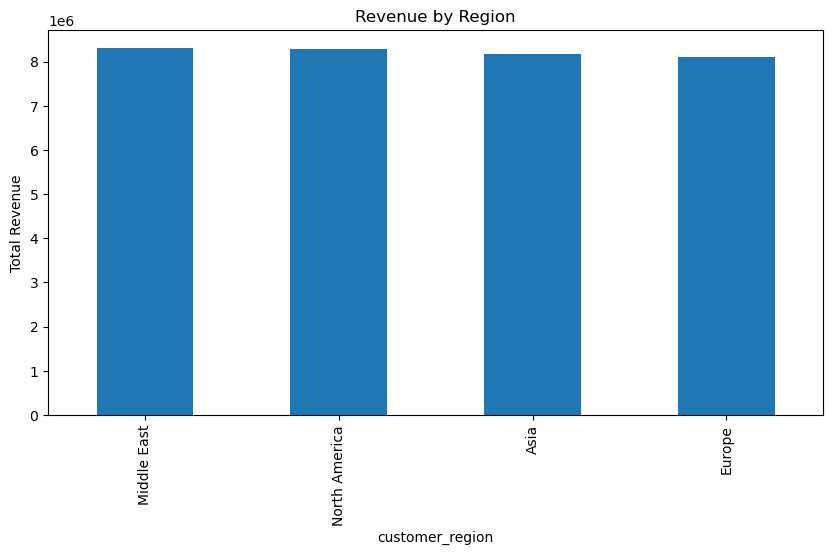

In [13]:
region_revenue = (
    df.groupby('customer_region')['total_revenue']
    .sum()
    .sort_values(ascending=False)
)

region_revenue
region_revenue.plot(kind='bar', figsize=(10,5), title="Revenue by Region")
plt.ylabel("Total Revenue")
plt.show()


### 🌍 Insight: Regional Performance
Certain regions outperform others in total revenue, highlighting geographic differences 
in demand and opportunities for region-specific strategies.


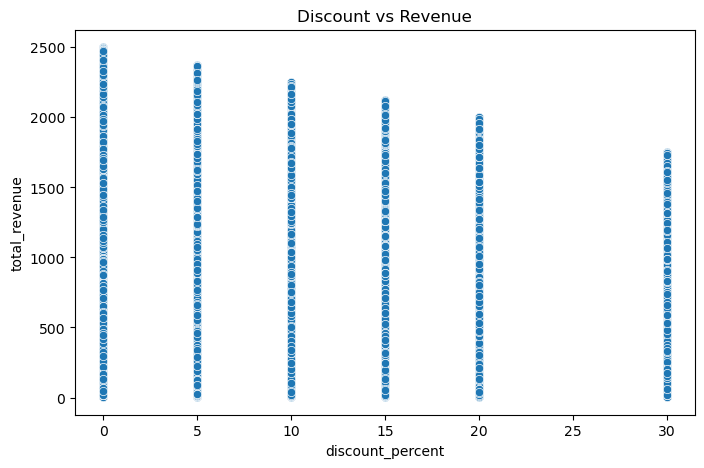

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='discount_percent',
    y='total_revenue'
)
plt.title("Discount vs Revenue")
plt.show()


### 📉 Insight: Discount vs Revenue
The analysis shows that higher discount percentages do not consistently lead to higher revenue. 
In many cases, increased discounts result in lower revenue, suggesting that aggressive 
discounting may erode margins without guaranteeing increased sales volume. 
This indicates the need for optimized, data-driven discount strategies rather than uniform price cuts.


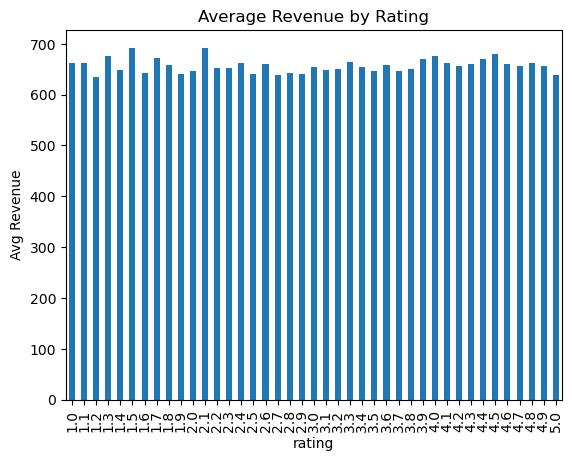

In [15]:
rating_revenue = (
    df.groupby('rating')['total_revenue']
    .mean()
)

rating_revenue.plot(kind='bar', title="Average Revenue by Rating")
plt.ylabel("Avg Revenue")
plt.show()


### ⭐ Insight: Customer Rating vs Average Revenue
Products with higher customer ratings tend to generate higher average revenue compared to 
lower-rated products. This highlights the strong relationship between customer satisfaction 
and sales performance, suggesting that improving product quality and customer experience 
can directly contribute to revenue growth.


In [17]:
top_products = (
    df.groupby('product_id')['total_revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


product_id
1931    18885.83
1087    18531.52
1328    18306.73
3537    18071.02
2837    17855.07
1266    17819.13
4386    17806.08
4264    17803.51
3700    17619.14
3377    17201.38
Name: total_revenue, dtype: float64